In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file
df = pd.read_csv("C:/Users/hoang/Downloads/household_power_consumption.csv")
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


# Chú thích
Tập dữ liệu này bao gồm dữ liệu tiêu thụ điện năng của một hộ gia đình trong vòng sáu tháng, thu thập từ tháng 1 năm 2007 đến tháng 6 năm 2007.

Các trường dữ liệu bao gồm:

`Date (Ngày)`: Ngày ghi nhận dữ liệu quan sát.

`Time (Giờ)`: Thời gian ghi nhận dữ liệu quan sát.

`Global_active_power`: Tổng công suất hoạt động tiêu thụ của hộ gia đình .

`Global_reactive_power`: Tổng công suất phản kháng tiêu thụ của hộ gia đình . 

`Voltage`: Mức điện áp cung cấp cho hộ gia đình . 

`Global_intensity`: Cường độ dòng điện trung bình được cung cấp cho hộ gia đình . 

`Sub_metering_1` : Công suất tiêu thụ của khu vực bếp . 

`Sub_metering_2` : Công suất tiêu thụ của khu vực giặt ủi . 

`Sub_metering_3`: Công suất tiêu thụ của máy nước nóng và máy điều hòa không khí . 



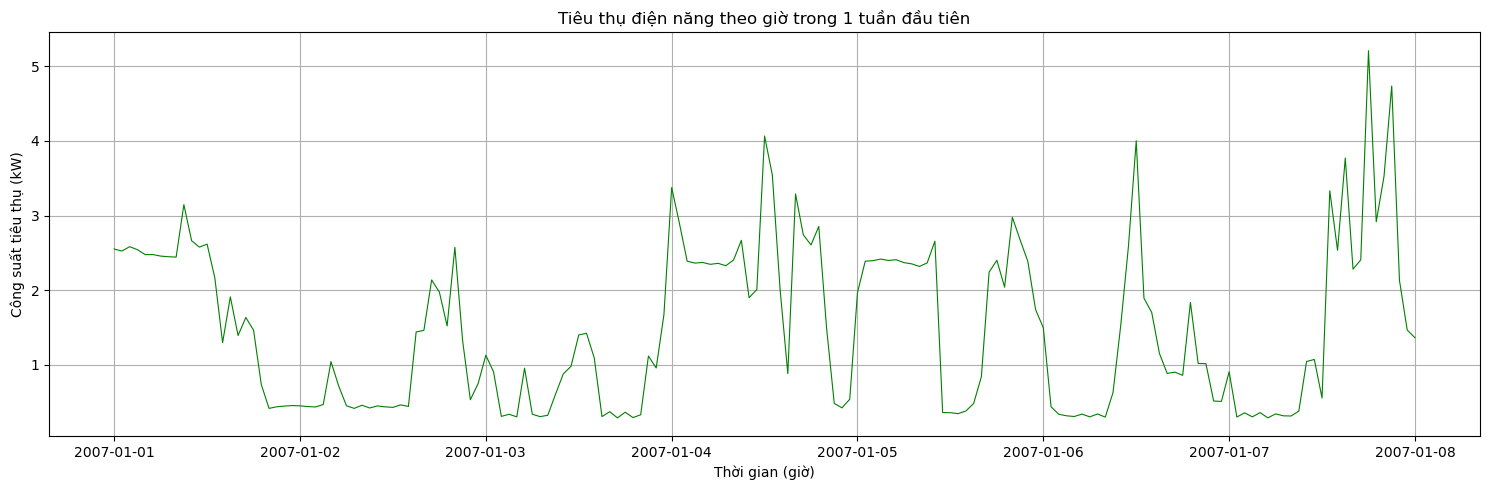

In [15]:
# Chuyển đổi dữ liệu
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%y %H:%M:%S', errors='coerce')
df = df.dropna(subset=['datetime', 'Global_active_power']).set_index('datetime')

# Resample theo giờ, lấy giá trị trung bình
hourly_power = df['Global_active_power'].resample('H').mean().dropna()

# Lấy tuần đầu tiên có dữ liệu
start_time = hourly_power.index.min()
end_time = start_time + pd.Timedelta(days=7)
weekly_power = hourly_power[start_time:end_time]

# Vẽ biểu đồ
plt.figure(figsize=(15, 5))
plt.plot(weekly_power.index, weekly_power.values, linewidth=0.8, color='green')
plt.title("Tiêu thụ điện năng theo giờ trong 1 tuần đầu tiên")
plt.xlabel("Thời gian (giờ)")
plt.ylabel("Công suất tiêu thụ (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()


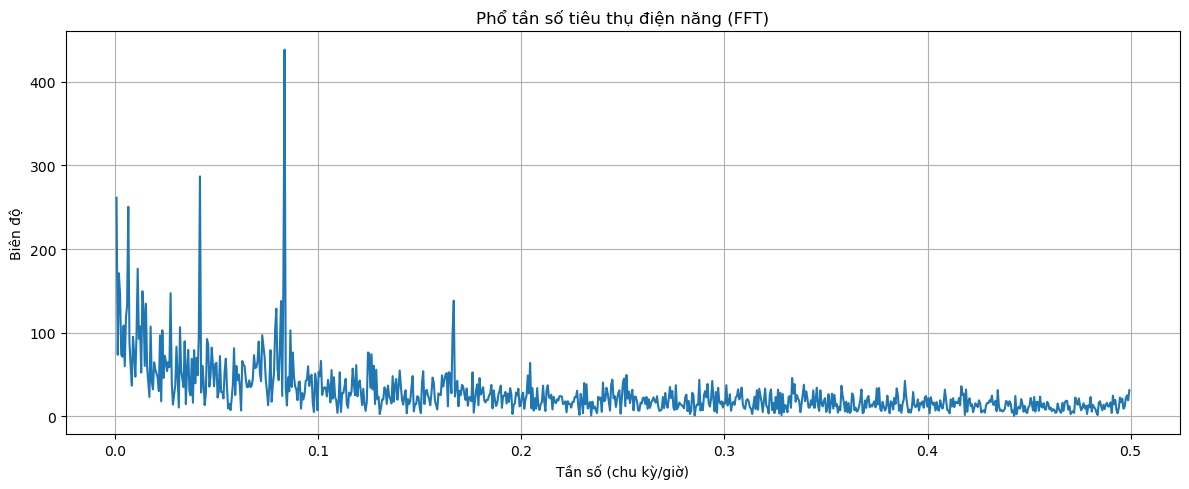

In [ ]:
# Thực hiện FFT
power_fft = np.fft.fft(hourly_power)
frequencies = np.fft.fftfreq(len(hourly_power), d=1)  # d=1 giờ

# Lấy biên độ
magnitude = np.abs(power_fft)

half = len(frequencies) // 2
plt.figure(figsize=(12, 5))
plt.plot(frequencies[1:half], magnitude[1:half]) 
plt.title("Phổ tần số tiêu thụ điện năng (FFT)")
plt.xlabel("Tần số (chu kỳ/giờ)")
plt.ylabel("Biên độ")
plt.grid(True)
plt.tight_layout()
plt.show()


`Trục hoành (x)`: Tần số tính theo đơn vị chu kỳ/giờ.

Ví dụ: tần số 1/24 ≈ 0.0417 ứng với chu kỳ 24 giờ (1 ngày).

Tần số 1/168 ≈ 0.00595 ứng với chu kỳ 168 giờ (1 tuần).

`Trục tung (y)`: Biên độ phổ tương ứng với mức độ đóng góp của từng tần số vào tín hiệu ban đầu.


In [17]:
# Tìm tần số có biên độ lớn nhất (bỏ tần số 0)
dominant_idx = np.argmax(magnitude[1:half]) + 1
dominant_frequency = frequencies[dominant_idx]
dominant_period_hours = 1 / dominant_frequency

print(f"Tần số chiếm ưu thế: {dominant_frequency:.5f} chu kỳ/giờ")
print(f"Chu kỳ chiếm ưu thế: khoảng {dominant_period_hours:.2f} giờ")


Tần số chiếm ưu thế: 0.08333 chu kỳ/giờ
Chu kỳ chiếm ưu thế: khoảng 12.00 giờ


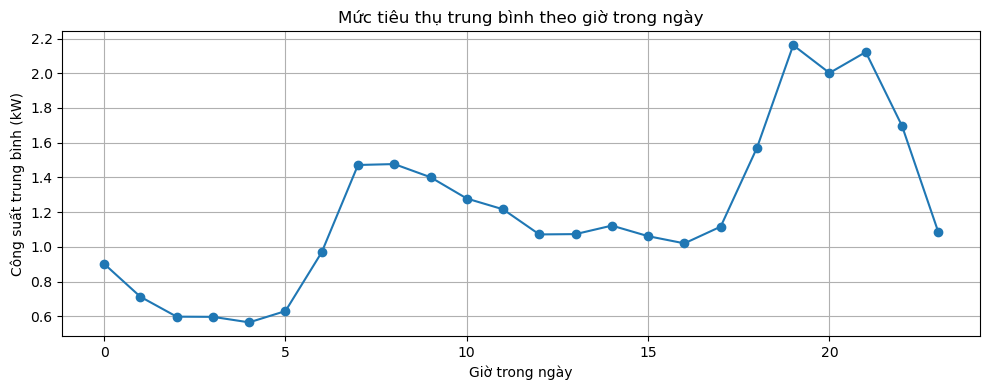

Giờ tiêu thụ cao nhất trong ngày: khoảng 19:00


In [18]:
# Trung bình theo giờ trong ngày
daily_pattern = hourly_power.groupby(hourly_power.index.hour).mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 4))
plt.plot(daily_pattern.index, daily_pattern.values, marker='o')
plt.title("Mức tiêu thụ trung bình theo giờ trong ngày")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Công suất trung bình (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()

peak_hour = daily_pattern.idxmax()
print(f"Giờ tiêu thụ cao nhất trong ngày: khoảng {peak_hour}:00")
